# Exploration du jeu de données OpenFood Facts
## Sommaire
## I) Import des données
## II) Analyse univariée
## III) Analyse bivariée
## IV) Analyse multivariée/PCA
## V) Conclusion


## I) Import des données

In [13]:
# Import des librairies utiles à notre études
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy
import sklearn


In [14]:
# Import du dataset préalablement nettoyé
off=pd.read_csv('off.csv')
off

,code,product_name,countries_en,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,Eco_friendly,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
0,1281,Tarte noix de coco,France,14.0,d,Sugary snacks,Biscuits and cakes,True,381.0,1594.0,22.00,15.50,27.30,21.90,4.40,4.60,0.10,0.04,14.0
1,5018,Crème d'Artichaut Bio Kazidomi,"Belgium,France",11.0,d,Salty snacks,Salty and fatty products,True,268.0,1104.0,27.40,3.90,1.80,0.00,3.50,1.90,2.70,1.08,11.0
2,10206515,Pâte à Sucre,France,18.0,d,Sugary snacks,Sweets,True,411.0,1720.0,6.42,3.53,87.86,81.67,0.00,0.03,0.10,0.04,18.0
3,12167005,Brioches roulées avec raisins,Canada,0.0,b,Sugary snacks,Biscuits and cakes,False,128.0,536.0,6.00,1.00,50.00,19.00,1.00,7.00,0.00,0.00,0.0
4,20045791,Muffin,United States,17.0,d,Sugary snacks,Biscuits and cakes,False,418.0,1749.0,21.76,5.29,51.76,32.94,2.40,5.88,0.67,0.27,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82667,96137062,Eat Natural Bars With Benefits Highin Fibre,"France,United Kingdom",22.0,e,Sugary snacks,Biscuits and cakes,True,964.0,4040.0,21.60,32.70,55.60,32.40,7.78,4.67,0.00,0.00,22.0
82668,9753185833239,Mélange à cuisson pour brownies,France,NaN,NaN,Sugary snacks,Biscuits and cakes,True,393.0,1663.0,5.10,3.00,80.50,53.50,4.40,4.10,0.19,0.08,13.5
82669,9900000000226,Noisettes,France,-4.0,a,Salty snacks,Nuts,True,628.5,2629.0,60.75,4.46,16.70,4.34,9.70,14.95,0.00,0.00,-4.0
82670,990530101017343360,Barre bio,France,9.0,c,Sugary snacks,Biscuits and cakes,True,509.0,2130.0,32.10,2.80,37.80,29.20,6.40,14.00,0.10,0.04,9.0


In [4]:
# On extrait un dataset qui ne contient les variables quantitatives
off2=off.loc[:,"energy_kcal_100g": "nutrition_score_fr_100g"]
off2

,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
0,381.0,1594.0,22.00,15.50,27.30,21.90,4.40,4.60,0.10,0.04,14.0
1,268.0,1104.0,27.40,3.90,1.80,0.00,3.50,1.90,2.70,1.08,11.0
2,411.0,1720.0,6.42,3.53,87.86,81.67,0.00,0.03,0.10,0.04,18.0
3,128.0,536.0,6.00,1.00,50.00,19.00,1.00,7.00,0.00,0.00,0.0
4,418.0,1749.0,21.76,5.29,51.76,32.94,2.40,5.88,0.67,0.27,17.0
...,...,...,...,...,...,...,...,...,...,...,...
82667,964.0,4040.0,21.60,32.70,55.60,32.40,7.78,4.67,0.00,0.00,22.0
82668,393.0,1663.0,5.10,3.00,80.50,53.50,4.40,4.10,0.19,0.08,13.5
82669,628.5,2629.0,60.75,4.46,16.70,4.34,9.70,14.95,0.00,0.00,-4.0
82670,509.0,2130.0,32.10,2.80,37.80,29.20,6.40,14.00,0.10,0.04,9.0


In [10]:
# Le jeu de données est ordonné par ordre ascendant du nutriscore
off=off.sort_values(by="nutrition_score_fr_100g", ascending=True, na_position='last')
off

,code,product_name,countries_en,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,Eco_friendly,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
76359,8005120219433,Chips croustillantes de topinambours,France,-14.0,a,Salty snacks,Appetizers,True,87.0,360.0,0.90,0.40,1.40,1.4,20.0,8.40,0.05,0.02,-14.0
77287,8034125101115,Marrons Entiers,France,-12.0,a,Salty snacks,Nuts,True,138.0,577.0,1.10,0.16,27.00,6.0,4.8,25.00,0.28,0.11,-12.0
55596,3350033027046,Amandes,France,-12.0,a,Salty snacks,Nuts,True,198.0,828.0,17.00,1.50,2.80,1.1,11.0,22.00,0.17,0.07,-12.0
45140,10149294,Whole Chesnuts,France,-12.0,a,Salty snacks,Nuts,True,206.0,862.0,1.30,0.00,41.00,6.0,6.0,50.00,0.00,0.00,-12.0
67271,5055534301609,Natuurlijke Noten (hele Amandelen) - Naturel -...,France,-11.0,a,Salty snacks,Nuts,True,1.0,4.0,68.00,4.40,6.90,4.2,7.4,21.00,0.00,0.00,-11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74520,7622300239190,Junior,Austria,36.0,e,Sugary snacks,Chocolate products,True,552.0,2185.0,26.00,15.00,66.00,61.0,0.1,4.50,38.00,15.20,36.0
39829,831617005047,"Cary's, Dark Chocolate Almonds With Hawaiian Salt",United States,36.0,e,Sugary snacks,Sweets,False,500.0,2092.0,33.33,19.44,55.56,50.0,0.0,5.56,2.36,0.94,36.0
26788,85629054900,Chews,United States,36.0,e,Sugary snacks,Sweets,False,500.0,2092.0,21.43,14.29,71.43,50.0,0.0,0.00,2.32,0.93,36.0
26787,85629054405,Chocolate Covered Coconut Caramels,United States,36.0,e,Sugary snacks,Sweets,False,500.0,2092.0,21.43,14.29,71.43,50.0,0.0,0.00,2.32,0.93,36.0


In [5]:
off.Eco_friendly.value_counts()

False    48624
True     34283
Name: Eco_friendly, dtype: int64

In [6]:
# Création d'une liste des variables quantitatives
num_var=['energy_kcal_100g','energy_100g','fat_100g','saturated_fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','sodium_100g', 'nutrition_score_fr_100g']

## II) Analyse univariée 

<AxesSubplot:xlabel='count', ylabel='countries_en'>

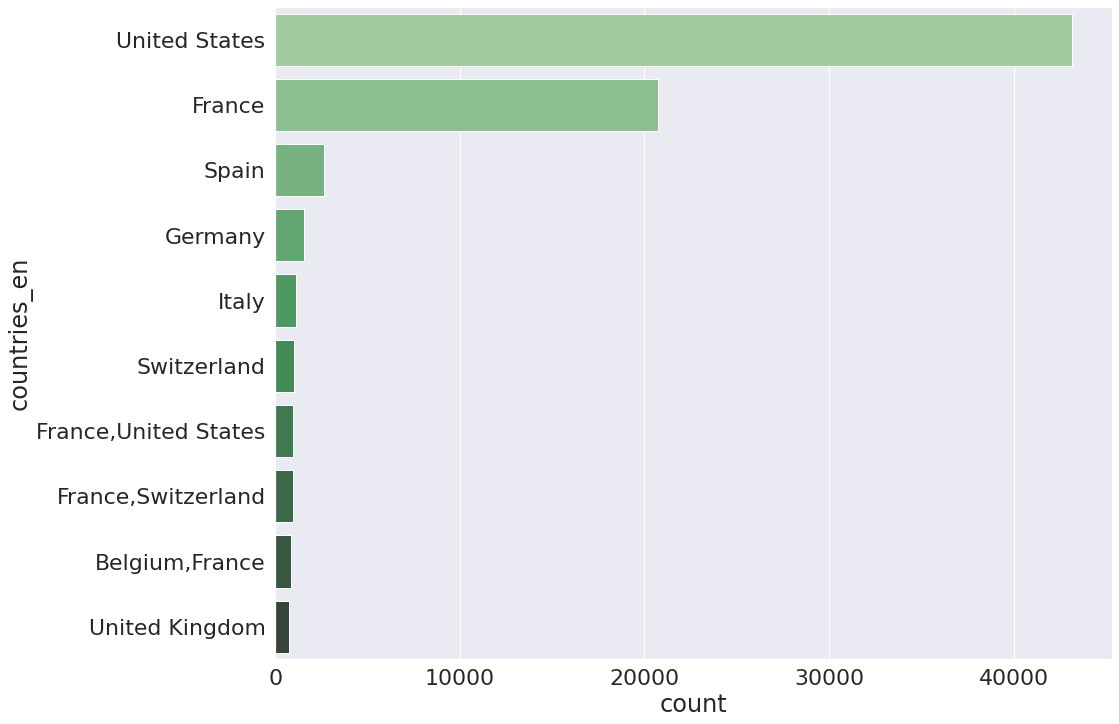

In [7]:
# Nombre de produits par pays

sns.set(rc={'figure.figsize':(15,12)}, font_scale = 2)
sns.countplot(y='countries_en',  data=off,  palette="Greens_d", 
order=off.countries_en.value_counts().iloc[:10].index) 

D'après le diagramme plus de la moitié des produits proviennent des Etats-Unis

## II) Analyse univariée 

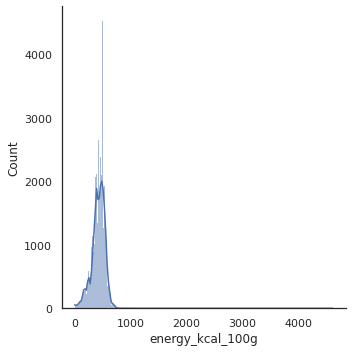

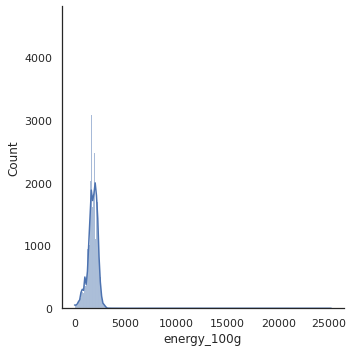

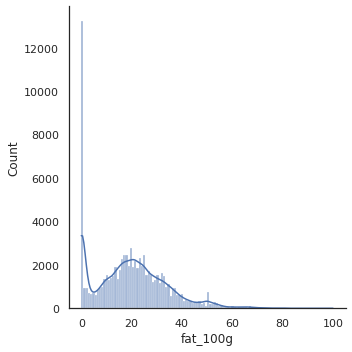

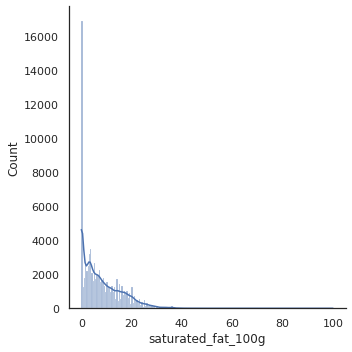

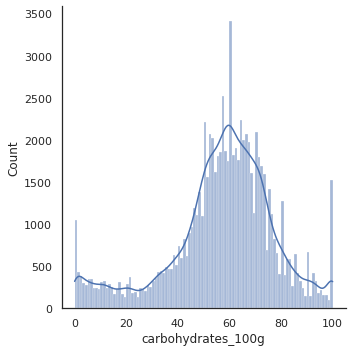

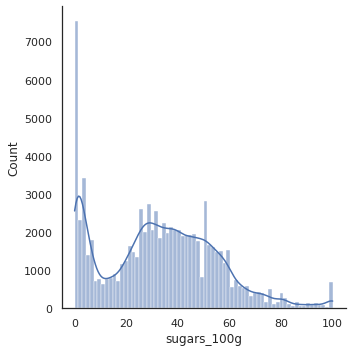

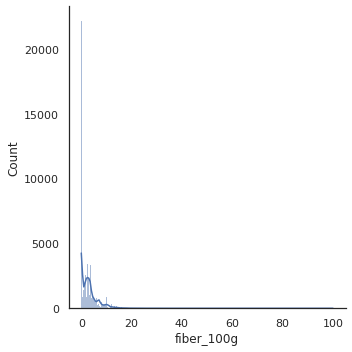

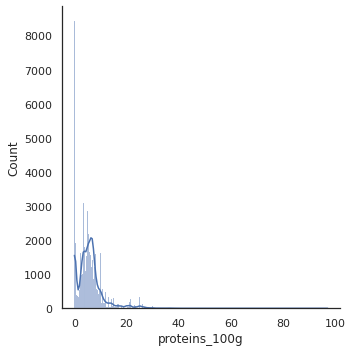

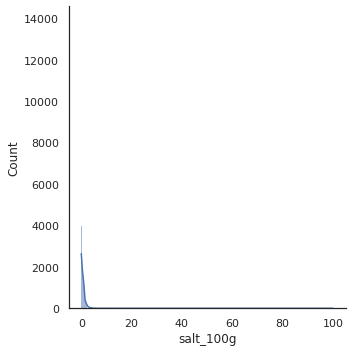

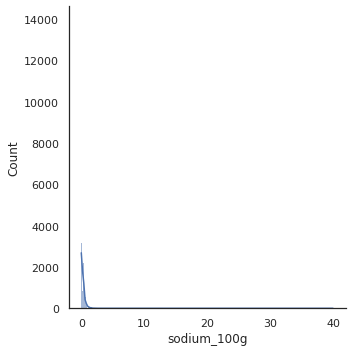

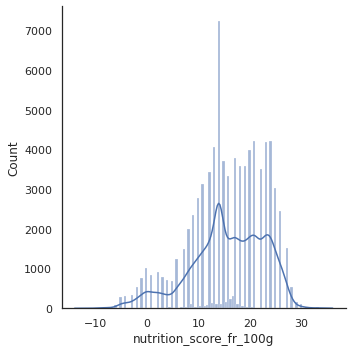

In [27]:
# Distribution des variables quantitatives

for col in num_var:
    
    sns.displot(off[col], kde=True)

La plupart des variables ont une distribution exponentielle

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


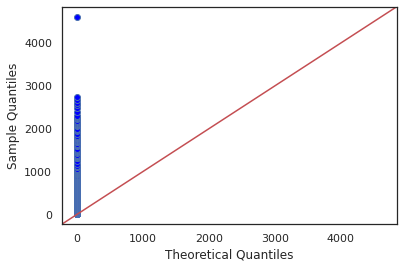

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


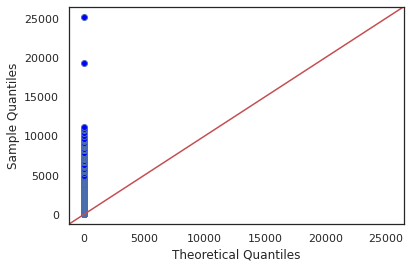

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


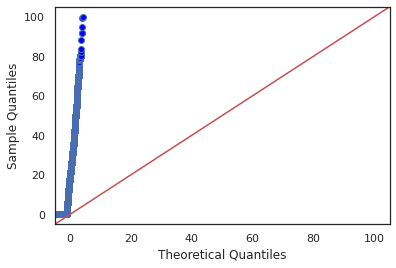

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


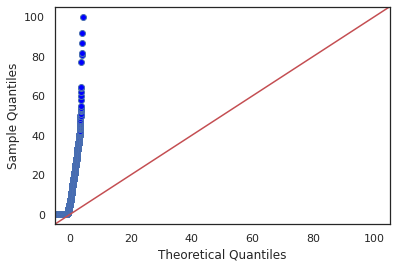

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


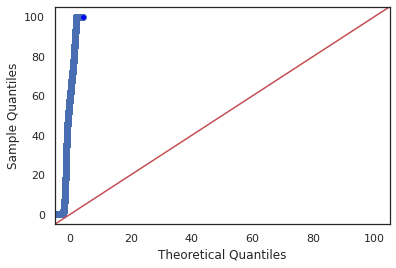

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


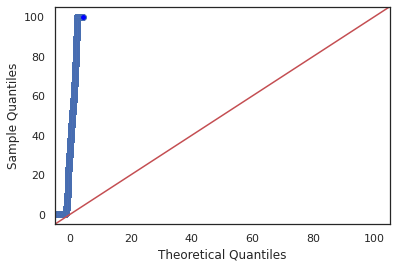

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


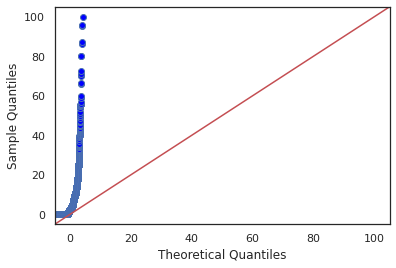

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


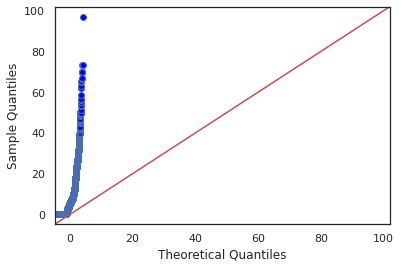

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


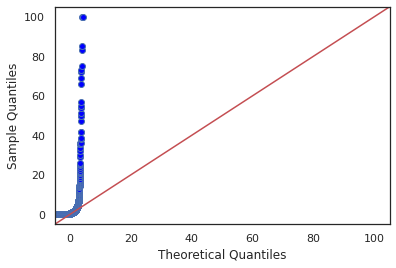

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


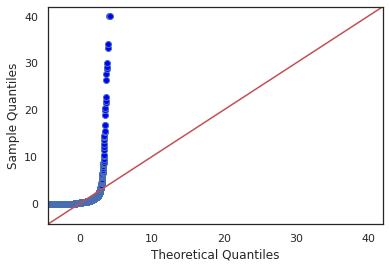

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/statsmodels/graphics/gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


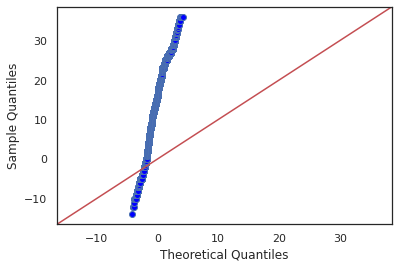

In [28]:
# Test de normalité des variables quantitatives 
import statsmodels.api as sm
import pylab
for col in num_var:
    
    sm.qqplot(off[col], line='45')
    pylab.show()

On constate d'après le test de normalité qu'aucune variable ne suit une loi normale.

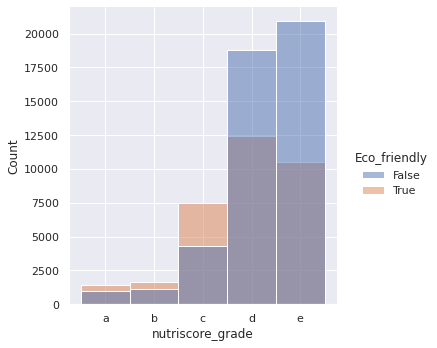

In [16]:
# Comptage du grade nutri-score des produits Eco friendly
sns.set(rc={'figure.figsize':(10,5)})

ax = sns.displot(x="nutriscore_grade", data=off, hue = 'Eco_friendly')

Le comptage nous indique les produits éco-responsable ont en moyenne un nutriscore plus favorable.


## III) Analyse bivariée

Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x7fbbaa32cee0>
Traceback (most recent call last):
  File "/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/matplotlib/transforms.py", line 222, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id(self): pop(k))
KeyboardInterrupt: 


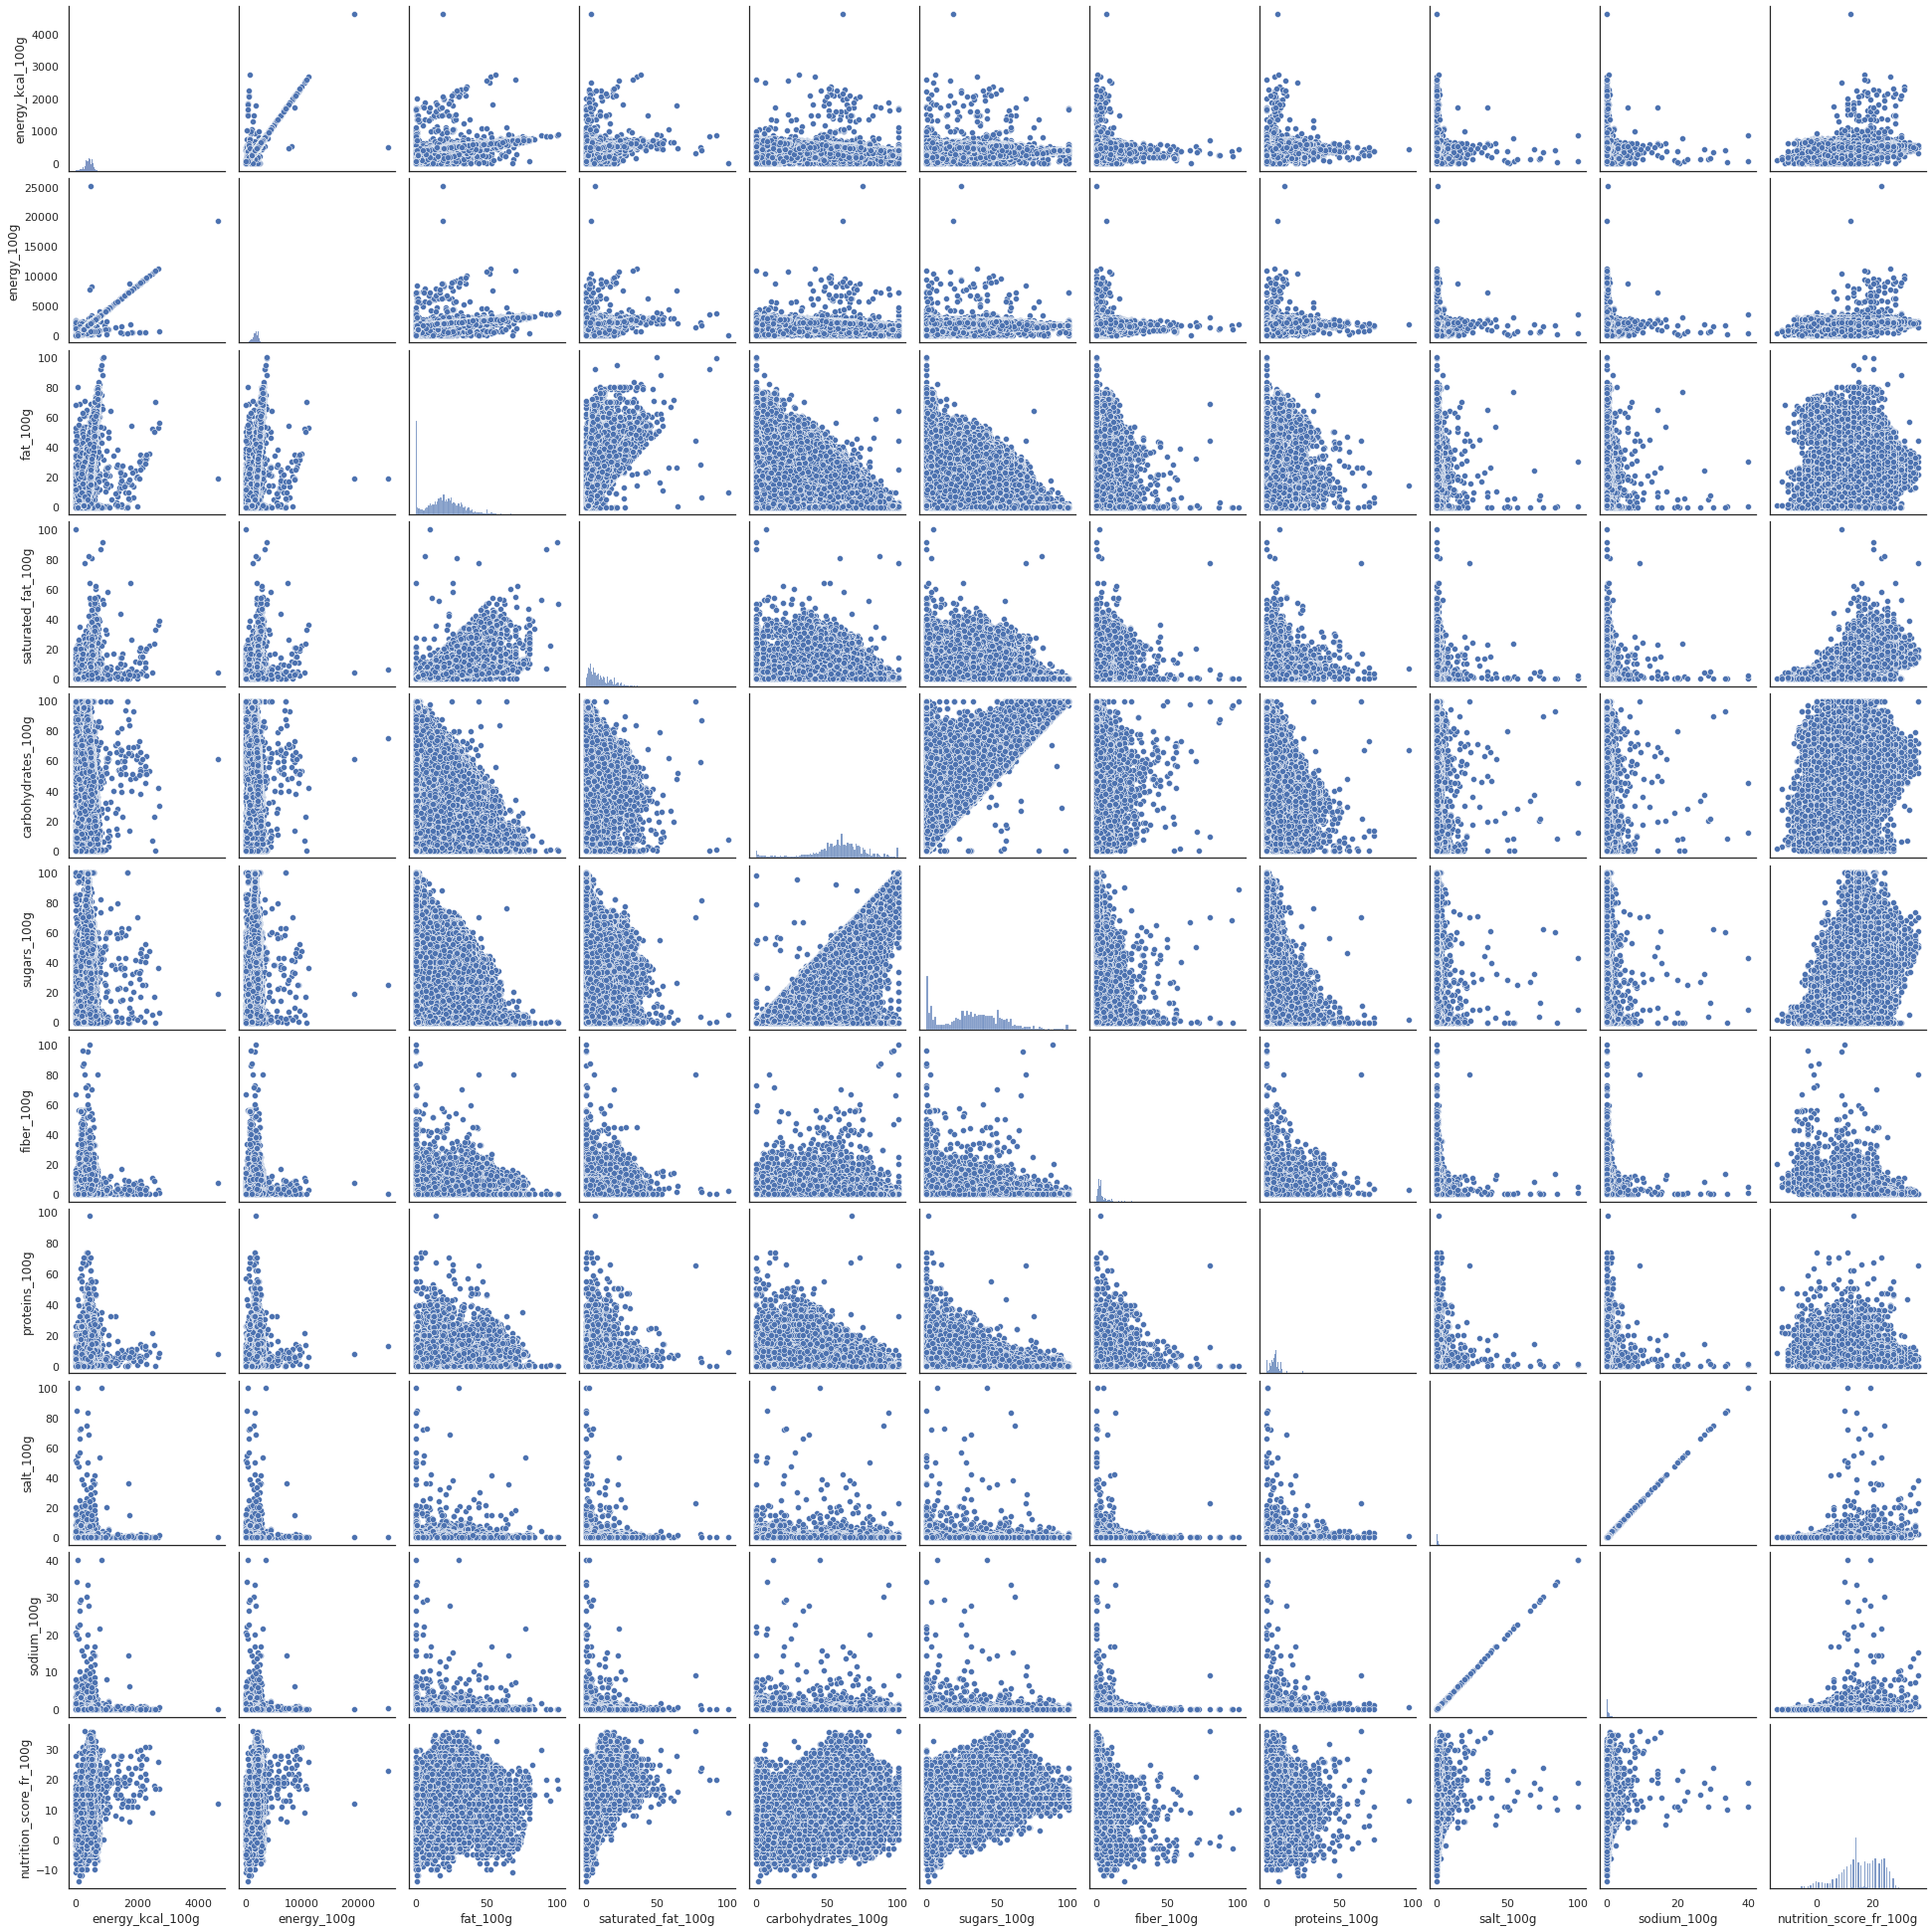

In [53]:
# L'analyse bivariée nous permettra de voir les plus fortes corrélations entre nos variables
sns.pairplot(data=off[num_var])

<AxesSubplot:>

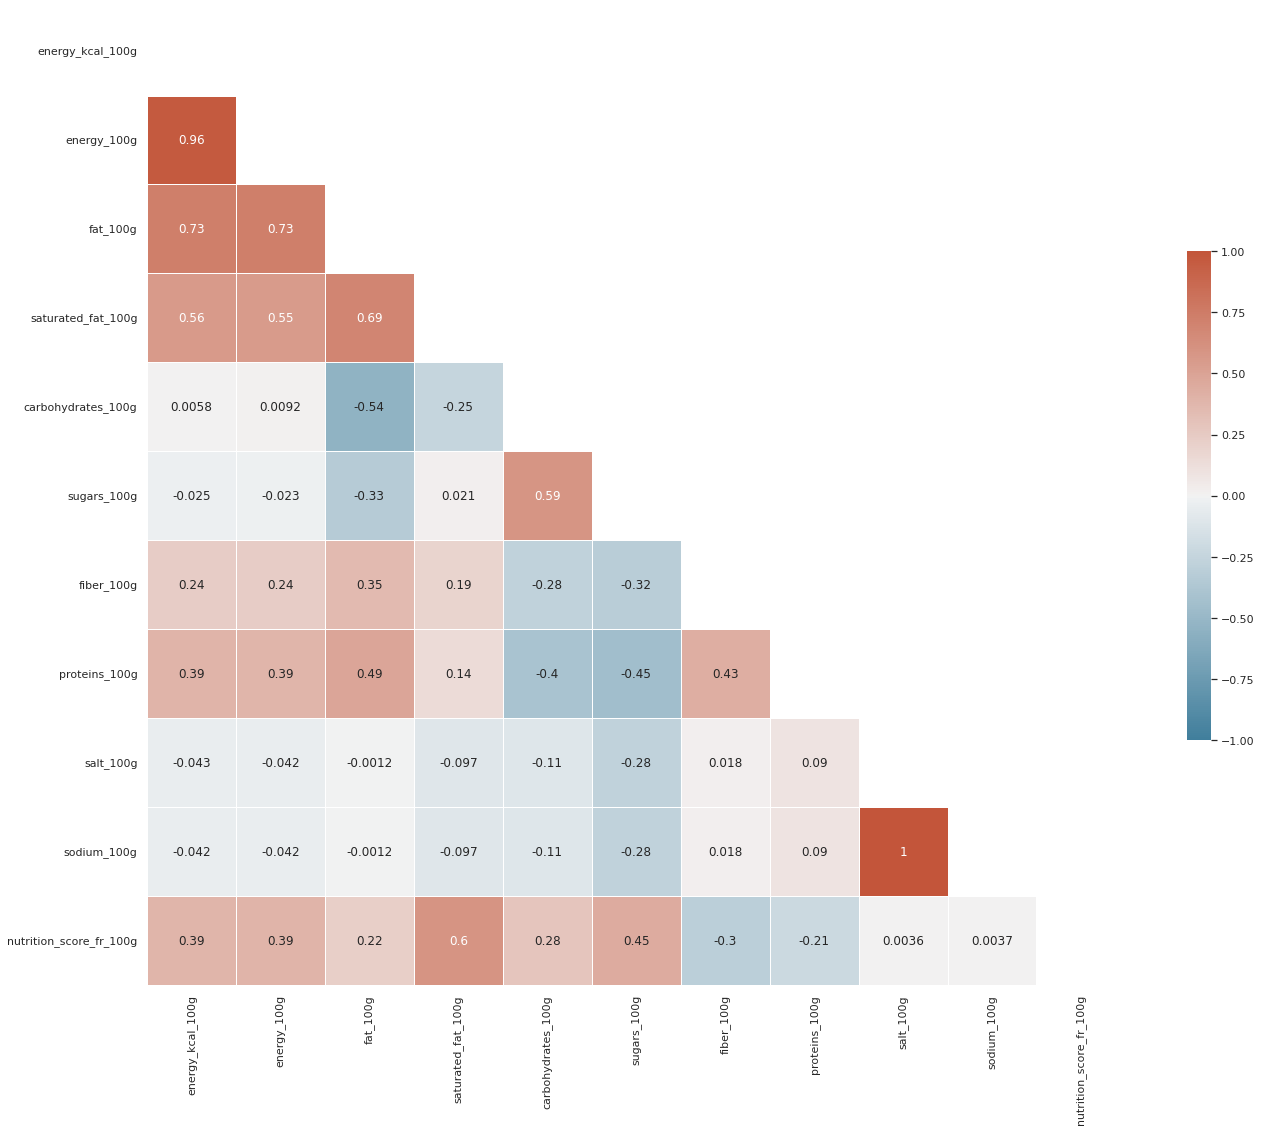

In [31]:
# La matrice de corrélation pour voir les plus fortes corrélations entre les variables 
sns.set_theme(style="white")

d = pd.DataFrame(data=off,
                 columns=num_var)

corr = d.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(22, 18))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmin=-1, vmax=1, annot=True, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

Une corrélation parfaite (entre salt_100g et sodium_100g) et quelques autres proches de 1 (celles entre sugars_100g et carbohydrates_100g, saturated_fat_100g et fat_100g).

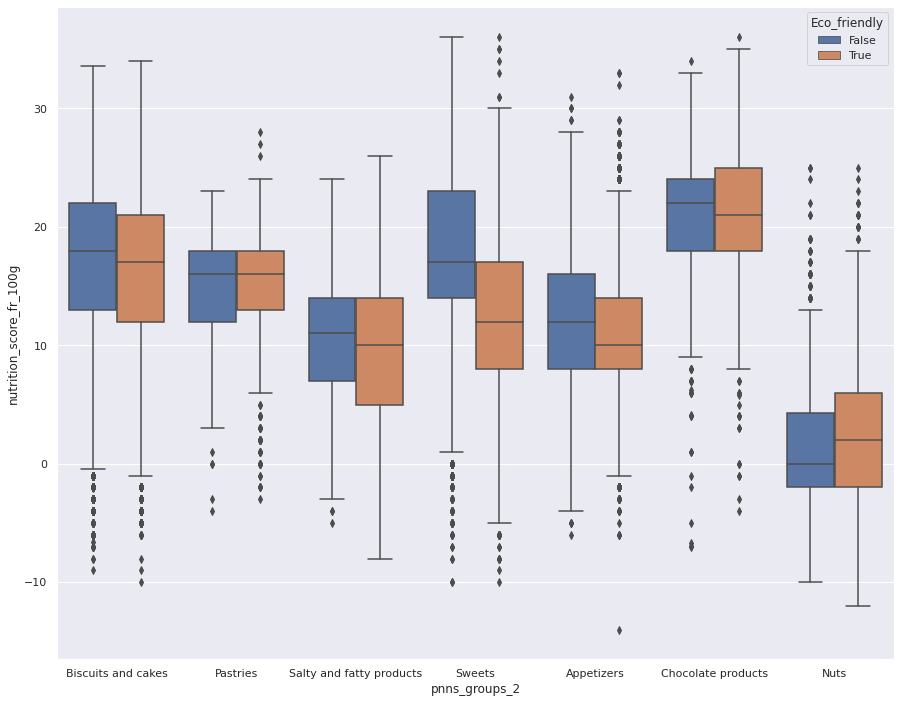

In [107]:
# Distribution de pnns_groups_1 selon le nutri-score et l'éco-responsabilité du produit
sns.set(rc={'figure.figsize':(15,12)})
ax = sns.boxplot(data=off, x='pnns_groups_2', y='nutrition_score_fr_100g', hue='Eco_friendly')

Confirmation que les produits éco-responsables sont en général plus sains d'après

## IV) Analyse multivariée/PCA 

In [19]:
# On importe les librairies nécessaires à notre PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [20]:
# Centrage et réduction
scaler=StandardScaler()
scaler.fit(off2)
scaled_data=scaler.transform(off2)


In [21]:
# Calcul des composantes principales
pca=PCA(n_components=10)
pca.fit(scaled_data)

PCA(n_components=10)

In [22]:
# Variance expliquée de la PCA
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

[0.3427184  0.24189875 0.16854443 0.09062085 0.06099232 0.04001543
 0.02932116 0.0143371  0.00749084 0.00405945]
0.9999987285057371


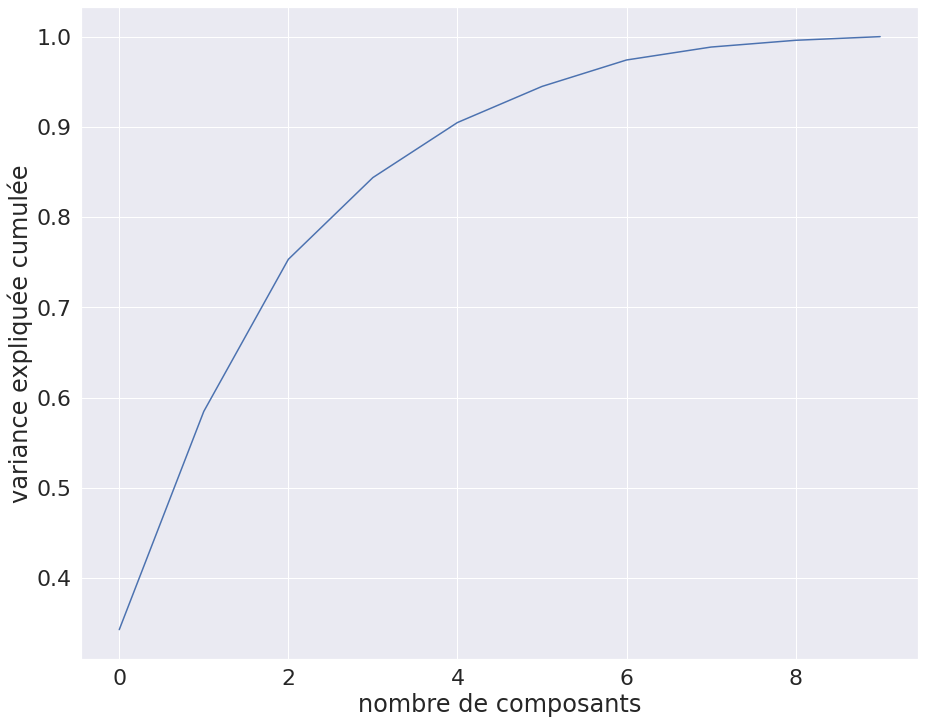

In [28]:
# Variance expliquée et cumulée de la PCA
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('nombre de composants')
plt.ylabel('variance expliquée cumulée');

A partir de 5 composants, 90% des données sont expliquées. Utile pour une éventuelle réduction de dimensions.

(-0.6, 0.6)

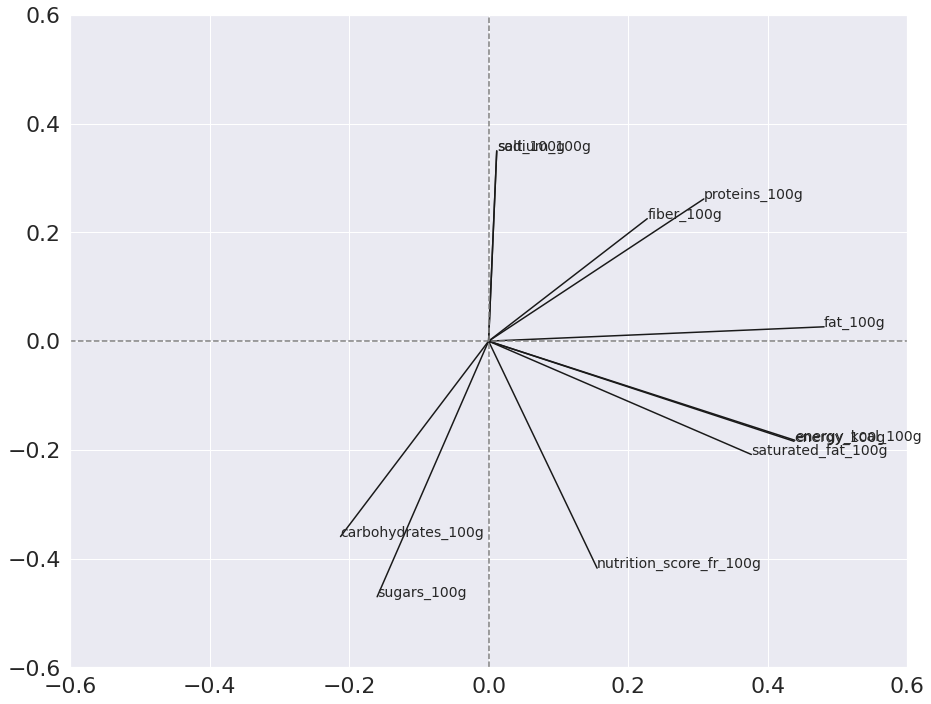

In [11]:
# Contribution de chaque variable aux composantes principales
pcs = pca.components_
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 2)

for i, (x, y) in enumerate(zip(pcs[0, :], pcs[1, :])):
    # Afficher un segment de l'origine au point (x, y)
    plt.plot([0, x], [0, y], color='k')
    # Afficher le nom (data.columns[i]) de la performance
    plt.text(x, y, off2.columns[i], fontsize='14')

# Afficher une ligne horizontale y=0
plt.plot([-0.6, 0.6], [0, 0], color='grey', ls='--')

# Afficher une ligne verticale x=0
plt.plot([0, 0], [-0.6, 0.6], color='grey', ls='--')

plt.xlim([-0.6, 0.6])
plt.ylim([-0.6, 0.6])

* La première composante explique environ un tiers de la variance observée dans les données et la deuxième 24.3%. Au total, ces deux composantes expliquent presque 60% de la variance totale, en utilisant seulement un cinquième des dimensions initiales. Ce qui signifie qu'il y a beaucoup de redondance dans nos données.

* D'après le graphique, les variables qui ont le plus contribué de façon positive à la première composante sont fat_100g ainsi que energy_kcal_100g et energy_100g, fiber_100g et proteins_100g dans un moindre degré.

* En ce qui concerne la deuxième composante on distingue salt_100g et sodium_100g qui y contribuent positivement et de façon égale. Nutrition_score_fr_100g, sugars_100g, carbohydrates_100g ont une contribution négative à PC2.

In [85]:
# Remise à zéro de l'index de off
off.reset_index(drop="True", inplace=True)
off

,code,product_name,countries_en,nutriscore_score,nutriscore_grade,pnns_groups_1,pnns_groups_2,Eco_friendly,energy_kcal_100g,energy_100g,fat_100g,saturated_fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition_score_fr_100g
0,8005120219433,Chips croustillantes de topinambours,France,-14.0,a,Salty snacks,Appetizers,True,87.0,360.0,0.90,0.40,1.40,1.4,20.0,8.40,0.05,0.02,-14.00
1,3350033027046,Amandes,France,-12.0,a,Salty snacks,Nuts,True,198.0,828.0,17.00,1.50,2.80,1.1,11.0,22.00,0.17,0.07,-12.00
2,8034125101115,Marrons Entiers,France,-12.0,a,Salty snacks,Nuts,True,138.0,577.0,1.10,0.16,27.00,6.0,4.8,25.00,0.28,0.11,-12.00
3,10149294,Whole Chesnuts,France,-12.0,a,Salty snacks,Nuts,True,206.0,862.0,1.30,0.00,41.00,6.0,6.0,50.00,0.00,0.00,-12.00
4,5055534301609,Natuurlijke Noten (hele Amandelen) - Naturel -...,France,-11.0,a,Salty snacks,Nuts,True,1.0,4.0,68.00,4.40,6.90,4.2,7.4,21.00,0.00,0.00,-11.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82902,85629054900,Chews,United States,36.0,e,Sugary snacks,Sweets,False,500.0,2092.0,21.43,14.29,71.43,50.0,0.0,0.00,2.32,0.93,36.00
82903,7622300239190,Junior,Austria,36.0,e,Sugary snacks,Chocolate products,True,552.0,2185.0,26.00,15.00,66.00,61.0,0.1,4.50,38.00,15.20,36.00
82904,40144078,M&M's Peanut Butter,France,36.0,e,Sugary snacks,Sweets,True,563.0,2360.0,30.50,18.80,51.60,51.6,0.0,0.00,2.23,0.89,36.00
82905,831617005047,"Cary's, Dark Chocolate Almonds With Hawaiian Salt",United States,36.0,e,Sugary snacks,Sweets,False,500.0,2092.0,33.33,19.44,55.56,50.0,0.0,5.56,2.36,0.94,36.00


# Conclusion

* Au vu du nombre de produits (83.000), la faisabilité de l'application est certaine.
* La consommation de produits éco-friendly présente un double intérêt, celui de consommer des produits plus sains en général ainsi que celui de préserver l'environnement.